In [1]:
# p.87 4.2 k-平均法を用いたクラスタリング
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
X = np.loadtxt('data_clustering.txt', delimiter=',')

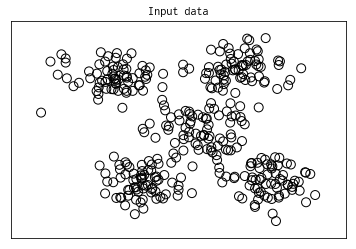

In [3]:
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
           edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
num_clusters = 5

In [5]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [6]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
step_size = 0.01

In [8]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1

x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),
                            np.arange(y_min, y_max, step_size))

In [9]:
output = kmeans.predict(np.c_[x_vals.ravel(),
                             y_vals.ravel()])

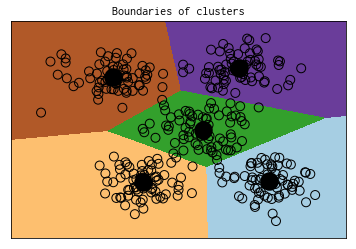

In [10]:
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
          extent=(x_vals.min(), x_vals.max(),
                 y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')

plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',
           edgecolors='black', s=80)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],
           marker='o', s=210, linewidth=4, color='black',
           zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()